<a href="https://colab.research.google.com/github/LiviuT30/Proiect-Front-end/blob/main/facerecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mtcnn

     |████████████████████████████████| 2.3 MB 4.4 MB/s 


In [ ]:
#olivetti
from sklearn import datasets

rng = np.random.RandomState(0)
olivetti = datasets.fetch_olivetti_faces()

olivettiData = {
    "images" : olivetti['images'],
    "labels" : olivetti['target']
}
print(olivettiData['images'])

NameError: ignored

In [ ]:
random_name = 'pins_Adriana Lima'
print(random_name[5:])

Adriana Lima


Dataset files


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!unzip gdrive/My\ Drive/celebrities.zip

Streaming output truncated to the last 5000 lines.
  inflating: 105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner128_843.jpg  
  inflating: 105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner130_845.jpg  
  inflating: 105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner131_846.jpg  
  inflating: 105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner132_847.jpg  
  inflating: 105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner133_848.jpg  
  inflating: 105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner134_849.jpg  
  inflating: 105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner135_850.jpg  
  inflating: 105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner137_851.jpg  
  inflating: 105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner139_852.jpg  
  inflating: 105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner13_844.jpg  
  inflating: 105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner141_854.jpg  
  inflating: 105_classes_p

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/content
10


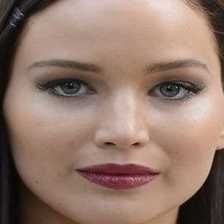

[[[79 82 90]
  [70 72 80]
  [57 59 67]
  ...
  [35 46 60]
  [45 57 69]
  [48 61 73]]

 [[71 74 82]
  [60 63 71]
  [56 58 66]
  ...
  [50 61 75]
  [30 42 55]
  [35 49 61]]

 [[62 65 73]
  [53 56 64]
  [56 59 67]
  ...
  [58 69 83]
  [49 62 75]
  [39 53 65]]

 ...

 [[20 19 23]
  [23 21 26]
  [35 33 38]
  ...
  [36 38 47]
  [29 30 40]
  [30 32 42]]

 [[21 20 24]
  [22 20 26]
  [34 31 38]
  ...
  [36 38 48]
  [30 33 42]
  [30 33 41]]

 [[22 21 25]
  [23 21 27]
  [34 32 38]
  ...
  [38 40 50]
  [32 34 44]
  [32 35 43]]]


In [ ]:
import torchvision
import os
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from mtcnn import MTCNN
from PIL import Image
from numpy import asarray

print(os.getcwd())
cwd = os.path.abspath(os.getcwd())
folders_img = os.listdir(f'{cwd}/105_classes_pins_dataset')
label_dic= {}
images= []
labels= []
detector = MTCNN()
for i, folder in enumerate(folders_img):
    if i == 10:
      break
    folder_celebrity = os.listdir(f'{cwd}/105_classes_pins_dataset/{folder}')
    folder_name = folder[5:]
    label_dic[i] = folder_name
    #Daca vrei sa modifici numarul de clase schimba i-ul 
    #Cand modifici numarul de clase va trebuii sa schimbi si parametri in functia de train_test_split
    
    for image in folder_celebrity:
      img = cv2.imread(f'{cwd}/105_classes_pins_dataset/{folder}/{image}')
      #cv2_imshow(img)
      results = detector.detect_faces(img)
      if results != [] :
        x1, y1, width, height = results[0]['box']
        x2, y2 = x1 + width, y1 + height
        face = img[y1:y2, x1:x2]
        image = Image.fromarray(face)
        image = image.resize((224,224))
        face_array = asarray(image)
        images.append(face_array)
        labels.append(i)
print(len(label_dic))
cv2_imshow(images[2])
print(images[2])

# 1 clase = 1 minute

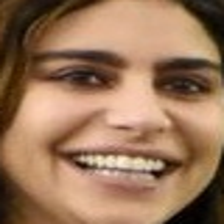

Nadia Hilker


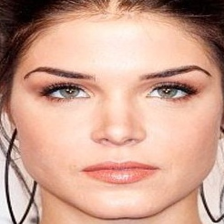

Marie Avgeropoulos


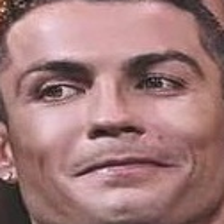

Cristiano Ronaldo


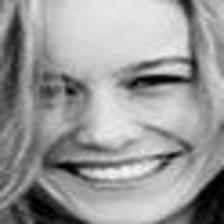

Brie Larson


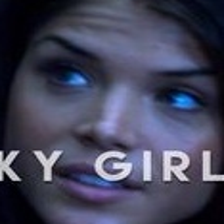

Marie Avgeropoulos


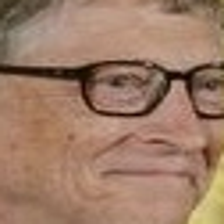

Bill Gates


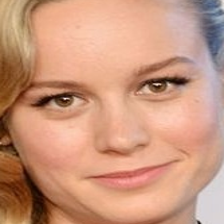

Brie Larson


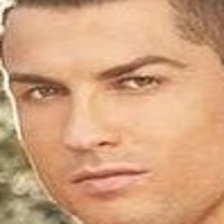

Cristiano Ronaldo


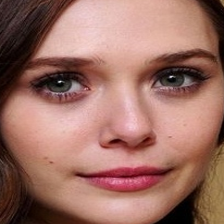

elizabeth olsen


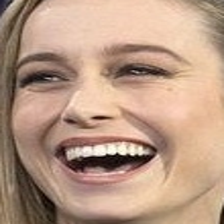

Brie Larson


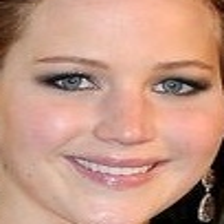

Jennifer Lawrence


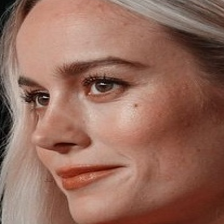

Brie Larson


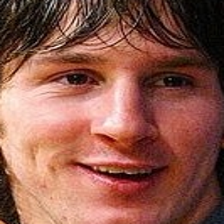

Lionel Messi


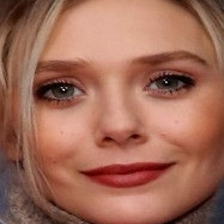

elizabeth olsen


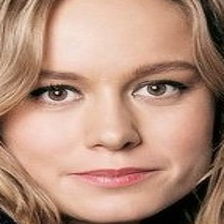

Brie Larson


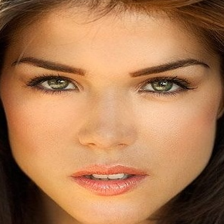

Marie Avgeropoulos


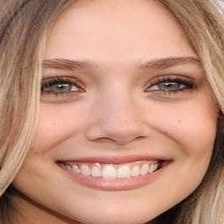

elizabeth olsen


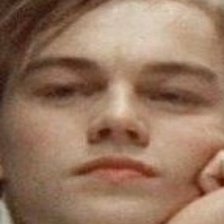

Leonardo DiCaprio


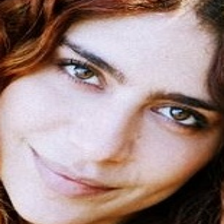

Nadia Hilker


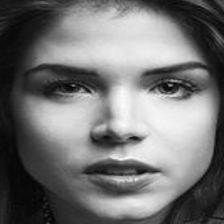

Marie Avgeropoulos


In [ ]:
import random

for x in range(0,20):
    rdm = random.randint(0, len(images))
    cv2_imshow(images[rdm])
    print(label_dic[labels[rdm]])

Imports

In [ ]:
from sklearn import datasets
import numpy as np
import torchvision as tv
import torch.nn as nn
import torch
from torch.utils.data import DataLoader
from torchvision.transforms.functional import to_tensor, normalize
import torch.optim as optim

DataSet


In [ ]:
import torch
import numpy as np
from torch.utils.data import DataLoader
from torchvision.transforms.functional import to_tensor, normalize, rgb_to_grayscale

labels_number = len(label_dic)

def collate_fn(examples):
  processed_images = []
  processed_labels = []

  for example in examples:
      #normalized_tensor_image = normalize(tensor_image, [0.5], [0.5])
      tensor_image = to_tensor(np.array(example[0]))
      normalized_tensor_image = normalize(tensor_image, [0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
      normalized_tensor_image = normalized_tensor_image.unsqueeze(0)
      processed_images.append(normalized_tensor_image)
      
      label = np.array(example[1])
      tensor_label = torch.tensor(label)
      tensor_label = tensor_label.unsqueeze(0)
      processed_labels.append(tensor_label)
    
  torch_images = torch.cat(processed_images, dim=0)
  torch_labels = torch.cat(processed_labels, dim=0)

  return torch_images, torch_labels

def collate_fn_o(examples):
  processed_images = []
  processed_labels = []

  for example in examples:
      
      tensor_image = to_tensor(example[0])
      tensor_image = tensor_image.unsqueeze(0)
      processed_images.append(tensor_image)
      
      label = np.array(example[1])
      tensor_label = torch.tensor(label)
      tensor_label = tensor_label.unsqueeze(0)
      processed_labels.append(tensor_label)
    
  torch_images = torch.cat(processed_images, dim=0)
  torch_labels = torch.cat(processed_labels, dim=0)

  return torch_images, torch_labels


In [ ]:

facesData = {
    "images" : images,
    "labels" : labels
}


class MyDataset(torch.utils.data.Dataset):
    def __init__(self, data):
        super().__init__()
        self.data = data

    # urmatoarele doua metode trebuie implementate
    def __getitem__(self, k):
        """Returneaza al k-lea exemplu din dataset"""
        return (
            self.data["images"][k],
            self.data["labels"][k]
        )

    def __len__(self):
        """Returneaza dimensiunea datasetului"""
        return len(self.data["labels"])


dataset = MyDataset(facesData)
print(len(facesData["labels"]))
#parametrii din random_split trebuie sa dea impreuna lungimea labelurilor
#train_dataset, test_dataset = torch.utils.data.random_split(dataset, [14027, 3507])
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [1250, 203])

print(test_dataset)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=10, shuffle=True, collate_fn=collate_fn)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=10, shuffle=True, collate_fn=collate_fn, drop_last=True)
test = next(iter(train_loader))

print(test[1])
test2 = next(iter(test_loader))
print(test2[1])
print(label_dic)

1453
tensor([8, 5, 4, 5, 0, 8, 1, 9, 8, 1])
tensor([1, 1, 6, 1, 1, 8, 4, 7, 6, 2])
{0: 'Jennifer Lawrence', 1: 'Marie Avgeropoulos', 2: 'camila mendes', 3: 'Nadia Hilker', 4: 'Brie Larson', 5: 'Cristiano Ronaldo', 6: 'Bill Gates', 7: 'Lionel Messi', 8: 'Leonardo DiCaprio', 9: 'elizabeth olsen'}


Model prototip lenet


In [ ]:
import torchvision.models as models
import torch.nn as nn

pretrained = models.resnet18(pretrained=True)

class MyResNet(nn.Module):
    def __init__(self, my_pretrained_model):
        super(MyResNet, self).__init__()
        self.pretrained = my_pretrained_model
        self.my_new_layers = nn.Sequential(nn.Linear(1000, 100),
                                           nn.ReLU(),
                                           nn.Linear(100, 10)
                                           )
    
    def forward(self, x):
        x = self.pretrained(x)
        x = self.my_new_layers(x)
        return x

my_extended_model = MyResNet(my_pretrained_model=pretrained)

In [ ]:
model_ft = models.vgg16(pretrained=True)


VGG MODEL


In [ ]:
import torch.optim as optim
DEVICE = 'cuda:0' if torch.cuda.is_available() else 'cpu'
epochs = 50
network = MyResNet(model_ft).cuda()
optimizer = optim.Adam(network.parameters(), lr=1e-4)
loss_fn = nn.CrossEntropyLoss()

RESNET

In [ ]:
import torch.optim as optim
DEVICE = 'cuda:0' if torch.cuda.is_available() else 'cpu'
epochs = 100
network = MyResNet(pretrained).cuda()
optimizer = optim.Adam(network.parameters(), lr=1e-4)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
def test_acc(net: nn.Module, test_loader: DataLoader):
  net.eval()
  
  total = 0
  correct = 0

  for test_images, test_labels in test_loader:
    if DEVICE == 'cuda:0':
        test_images = test_images.cuda()
    #nlabels = []
    #for label in test_labels:
      #new_label = [0 for i in range(0,6)]
      #new_label[label-1] = 1
      #nlabels.append(new_label)
    #test_labels = nlabels
    #test_labels = np.array(test_labels)
    #test_labels = to_tensor(test_labels)
    if DEVICE == 'cuda:0':
        test_labels = test_labels.cuda()
    total += len(test_images)
    out_class = torch.argmax(net(test_images))
    correct += torch.sum(out_class == test_labels)


  return correct / total * 100


def plot_accs(accs):
  plt.plot(accs)
  plt.title("Rezultate acuratete")
  plt.show()
  


def train_fn(epochs: int, train_loader: DataLoader, test_loader: DataLoader, 
             net: nn.Module, loss_fn: nn.Module, optimizer: optim.Optimizer):
  
  bestEpoca = 0
  max_acc = 0
  # Iteram prin numarul de epoci
  #net.to(DEVICE)
  accs = []
  for e in range(epochs):
    net.train()
    # Iteram prin fiecare batch din dataloader
    for images, labels in train_loader:
      if DEVICE == 'cuda:0':
        images = images.cuda()
      #nlabels = []
      #for label in labels:
       # new_label = [0 for i in range(0,6)]
        #new_label[label-1] = 1
        #nlabels.append(new_label)
      #labels = nlabels
      #labels = np.array(labels)
      #labels = to_tensor(labels)
      #labels = labels.squeeze()
      if DEVICE == 'cuda:0':
        labels = labels.cuda()
      #print(labels)
      out = net(images)
      #print(out)
      #print(xd)
      loss = loss_fn(out, labels)
      loss.backward()

      optimizer.step()

      optimizer.zero_grad()
    
    print("Loss-ul la finalul epocii {} are valoarea {}".format(e, loss.item()))

    # Calculam acuratetea
    acc = test_acc(net, test_loader)
    accs.append(acc)
    if acc == max(accs) :
        print("!!!!!!!!!!!!!!!!!!! NEW BEST MODEL !!!!!!!!!!!!!!!!")
        torch.save(network.state_dict(), "model.pt")
        bestEpoca = e
        max_acc = acc

    print("Acuratetea la finalul epocii {} este {:.2f}%".format(e + 1, acc))
  print(accs)
  print(f'Cel mai bun model optinul in epoca {bestEpoca} cu o acuratete de {max_acc}')
  #plot_accs(accs)

In [ ]:
train_fn(epochs, train_loader, test_loader, network, loss_fn, optimizer)

Loss-ul la finalul epocii 0 are valoarea 0.7682008147239685
!!!!!!!!!!!!!!!!!!! NEW BEST MODEL !!!!!!!!!!!!!!!!
Acuratetea la finalul epocii 1 este 3.00%
Loss-ul la finalul epocii 1 are valoarea 0.6336362361907959
!!!!!!!!!!!!!!!!!!! NEW BEST MODEL !!!!!!!!!!!!!!!!
Acuratetea la finalul epocii 2 este 3.50%
Loss-ul la finalul epocii 2 are valoarea 0.032267145812511444
!!!!!!!!!!!!!!!!!!! NEW BEST MODEL !!!!!!!!!!!!!!!!
Acuratetea la finalul epocii 3 este 4.50%
Loss-ul la finalul epocii 3 are valoarea 0.024916673079133034
Acuratetea la finalul epocii 4 este 2.50%
Loss-ul la finalul epocii 4 are valoarea 0.33373576402664185
Acuratetea la finalul epocii 5 este 2.50%
Loss-ul la finalul epocii 5 are valoarea 0.009791599586606026
Acuratetea la finalul epocii 6 este 1.00%
Loss-ul la finalul epocii 6 are valoarea 0.0070577808655798435
Acuratetea la finalul epocii 7 este 3.50%
Loss-ul la finalul epocii 7 are valoarea 0.24495890736579895
Acuratetea la finalul epocii 8 este 0.50%
Loss-ul la finalu

Accuracy test function needs to be tweeked. lower LOSS value should indicate a higher ACC.

In [ ]:
import torch.nn as nn

class LeNet5(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.main1 = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=7, stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        self.main2 = nn.Sequential(
            nn.Conv2d(6, 16, kernel_size=8, stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.flatten = nn.Flatten()
        self.activation1 = nn.Softmax(1)
        self.linear = nn.Linear(1936, labels_number)
        
    def forward(self, x):
        out = self.main1(x)
        out = self.main2(out)
        out = self.flatten(out)
        out = self.linear(out)
        out = self.activation1(out)
        return out

In [ ]:
import torch.nn as nn

class LeNet5(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.main = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=7, stride=1, padding=0),
            nn.Softmax(2),
            nn.MaxPool2d(kernel_size=1,stride=2),
            nn.BatchNorm2d(6),
            nn.Conv2d(6, 16, kernel_size=8, stride=1, padding=0),
            nn.Softmax(2),
            nn.MaxPool2d(kernel_size=1, stride=2),
            nn.Flatten(),
            nn.Linear(1936, labels_number),
            nn.Softmax(1)
        )
        
        
        
    def forward(self, x):
        out = self.main(x)
        return out

In [ ]:
test = next(iter(train_loader))
print(test[0].shape)
layer1 = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=7, stride=1, padding=0),
            nn.MaxPool2d(kernel_size=1,stride=2),
            nn.BatchNorm2d(6),
            nn.Conv2d(6, 16, kernel_size=8, stride=1, padding=0),
            nn.MaxPool2d(kernel_size=1, stride=2),
            nn.ReLU(), 
            nn.Flatten(),
            nn.Linear(1936, labels_number),
            nn.ReLU()
        )
            

print(layer1(test[0]).shape)
#5848

torch.Size([15, 1, 64, 64])
torch.Size([15, 6])


In [ ]:
import torch.optim as optim

epochs = 100
#print(torch.cuda.get_device_name())
DEVICE = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(DEVICE)
#network = LeNet5(40)
network = LeNet5(labels_number)



optimizer = optim.Adam(network.parameters(), lr = 4e-6)


optimizer.zero_grad()

loss_fn = nn.CrossEntropyLoss()